In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
df = pd.read_csv("data/bank-additional-full.csv",delimiter=';')

In [73]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [74]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [75]:
X = df.iloc[:,:-1]
y = df['y']

In [76]:
X = pd.get_dummies(data=X, drop_first=True)
y = pd.get_dummies(data=y, drop_first=True)
X.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [7]:
y.to_numpy().ravel().shape

(41188,)

In [77]:
# Scaling and normalizing the data
ss = preprocessing.StandardScaler()
X_normalized = ss.fit_transform(X)

In [78]:
df_X_mms = pd.DataFrame(X_normalized, columns = X.columns)
df_X_mms.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
5,0.477486,-0.232513,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
6,1.820911,-0.460069,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
7,0.093650,-0.159232,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
8,-1.537652,0.469442,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
9,-1.441693,-0.803333,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857


In [79]:
c_space = np.logspace(-4, 4, 20)
c_space

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best C : 0.9349918110371148


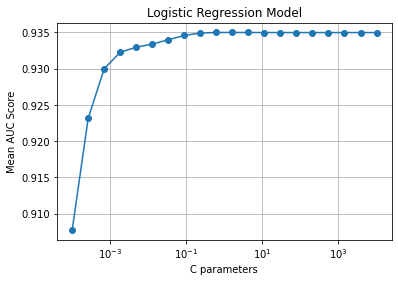

In [119]:
c_space = np.logspace(-4, 4, 20)
param_grid={'C' : c_space}

auc_scores = []

for c in c_space:
    log_reg_model = LogisticRegression(C=c)
    log_reg_cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
    score = cross_validate(log_reg_model, X_normalized, y, scoring='roc_auc', cv=log_reg_cv, n_jobs=-1)
    auc_scores.append(np.mean(score['test_score']))


idx = np.argmax(auc_scores)
print(f"Best C : {auc_scores[idx]}")
fig, ax = plt.subplots()
ax.plot(c_space,auc_scores,marker = 'o')
ax.set_xscale('log')
# Set plot title and axes labels
ax.set(title = "Logistic Regression Model",
       xlabel = "C parameters",
       ylabel = "Mean AUC Score")
plt.grid()
plt.show()

In [17]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 150, 250],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3],
    'n_estimators': [10, 50, 100, 250, 500, 1000]
}
# Create a based model
rf_model = RandomForestClassifier()
# evaluate the model
rfr_cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring='roc_auc',
                          cv = rfr_cv, n_jobs = 10, verbose = 2, refit=callable)
# Fit the grid search to the data for y1
print("Grid result for X normalized and Y1")
grid_results = grid_search.fit(X_normalized, y.to_numpy().ravel())
print(grid_results.best_params_)

Grid result for X normalized and Y1
Fitting 9 folds for each of 108 candidates, totalling 972 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    9.1s
/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:  3.9min
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed: 11.5min


KeyboardInterrupt: 

In [19]:
sc = preprocessing.StandardScaler()
X_std_scaled = sc.fit_transform(X)

In [21]:
df_X_sc = pd.DataFrame(X_std_scaled, columns = X.columns)
df_X_sc.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
5,0.477486,-0.232513,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
6,1.820911,-0.460069,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
7,0.093650,-0.159232,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
8,-1.537652,0.469442,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
9,-1.441693,-0.803333,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857


In [122]:
parameter_space = {
    'hidden_layer_sizes': [(10,10,10), (10,10,10,10), (10,10,10,10,10), (10,10,10,10,10,10)],
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]
}
mlp_model = MLPClassifier()
mlp_cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = mlp_model, param_grid = parameter_space, scoring='roc_auc',
                          cv = mlp_cv, n_jobs = -1, verbose = 2, refit=callable)
grid_results = grid_search.fit(X_std_scaled, y.to_numpy().ravel())
print(grid_results.best_params_)
print(f"Auc mean score : {np.mean(grid_search['test_score'])}")

Fitting 9 folds for each of 20 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 22.1min finished


{'alpha': 1e-05, 'hidden_layer_sizes': (10, 10, 10)}


TypeError: 'GridSearchCV' object is not subscriptable

In [124]:
nn_model = MLPClassifier(**grid_results.best_params_)
five_fold_cv = KFold(n_splits=5, random_state=1, shuffle=True)
y_pred_nn = cross_val_predict(nn_model, X_std_scaled, y.to_numpy().ravel(), cv=five_fold_cv)
print(classification_report(y, y_pred_nn))

/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     36548
           1       0.61      0.55      0.58      4640

    accuracy                           0.91     41188
   macro avg       0.78      0.75      0.76     41188
weighted avg       0.91      0.91      0.91     41188



/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [98]:
y['yes'].unique()

array([0, 1], dtype=uint8)

In [102]:
y_np = y.to_numpy().ravel()

In [110]:
X_std_scaled.head(5)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [112]:
log_reg_model = LogisticRegression(C=1,max_iter=1000)
five_fold_cv = KFold(n_splits=5, random_state=1, shuffle=True)
y_pred = cross_val_predict(log_reg_model, X_std_scaled, y_np, cv=five_fold_cv)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     36548
           1       0.67      0.42      0.52      4640

    accuracy                           0.91     41188
   macro avg       0.80      0.70      0.73     41188
weighted avg       0.90      0.91      0.90     41188



In [104]:
def class_report(model):
    mlp_model_tuned = MLPRegressor(**grid_results.best_params_)
    five_fold_cv = KFold(n_splits=5, random_state=1, shuffle=True)
    for train_index, test_index in five_fold_cv.split(merged):
        X_train, X_test = X_std_scaled[train_index], X_std_scaled[test_index]
        y_train, y_test = y_np[train_index], y_np[test_index]
        model.fit(X_train, y_train) #Training the model
        target_names = ['0.0', '1.0']
        print(classification_report(y_test, model.predict(X_test),target_names=target_names))
              
log_reg_model = LogisticRegression(C=1)
class_report(log_reg_model)

TypeError: cannot perform reduce with flexible type

In [ ]:
make_scorer(classification_report_with_accuracy_score)

In [51]:
score_result

array([0.92891505, 0.93866482, 0.93470792, 0.92667313, 0.93173245])

In [ ]:
five_fold_cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [68]:
merged = pd.concat([df_X_sc, y], axis=1, join='inner')
merged.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,yes
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,0


In [118]:
scrrss = np.array([10,20,30,40,50])
idx = np.argmax(scrrss)
scrrss[idx]

50